<a href="https://colab.research.google.com/github/anilsolankar01/state_data/blob/main/state_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# states education data


In [2]:
# Load and view the data
import pandas as pd
df=pd.read_csv('d_c__.csv')
df.head()

,State_UT,mean_dropout,enrollment_ratio,comp,electricity,water,boys_toilet,female_toilet
0,A & N Islands,7.191667,83.746667,50.113636,60.893636,63.636364,63.636364,63.636364
1,Andhra Pradesh,9.850000,75.552500,58.854545,95.706364,97.686364,99.777273,99.913636
2,Arunachal Pradesh,13.250000,102.067500,50.401818,69.061818,84.240000,88.652727,89.777273
3,Assam,15.022500,79.004167,40.657273,63.560000,92.052727,82.017273,85.845455
4,Bihar,9.891869,82.744167,26.106364,52.833636,97.268182,92.170000,93.288182


In [3]:
dfc=df.copy()

In [4]:
# See summary statistic of all features
df.describe()

,mean_dropout,enrollment_ratio,comp,electricity,water,boys_toilet,female_toilet
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,8.461537,87.501481,56.649040,77.322273,88.613005,88.845126,89.198207
std,3.269587,11.140282,18.652291,17.031949,13.028974,12.647153,12.505814
min,3.617500,65.176667,20.286364,44.529091,51.056364,53.592727,54.163636
25%,6.208958,78.875625,45.362273,65.954545,85.073182,84.114545,86.952727
50%,8.132467,85.703750,55.176818,77.490000,90.909091,90.909091,90.909091
75%,10.215833,94.624792,71.116818,90.909091,98.686818,99.052955,99.140909
max,19.156667,111.035000,97.350000,99.960909,99.986364,99.927273,99.974545


In [6]:
# Normalization of features
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
model=mx.fit(df.drop('State_UT',axis=1))
df[['mean_dropout','enrollment_ratio','comp','electricity','water','boys_toilet','female_toilet']]=model.transform(df.drop('State_UT',axis=1))

We don't know the number of clusters beforehand. We will determine it in case of KMeans Clustering algorithm using Elbow Method. This is called Elbow Method because we will choose the cluster at that point of the graph from where it stops falling sleeply(just like an elbow of hand). It is the point where the WCSS(Within Cluster Sum of Squares) decreases very slowly. 

WCSS is the distance between points in a cluster.

[16.667217803032308, 9.626212362618737, 6.484020728239907, 5.35539607097067, 4.537588419109001, 4.051586367697858, 3.5006975880106896, 3.202980833700568, 2.9190550309017222]


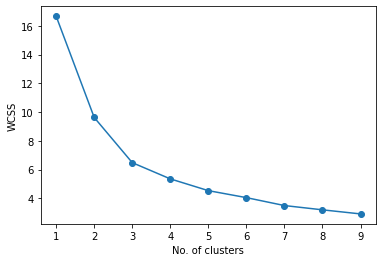

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss=[]
for i in range(1,10):
  kmeans=KMeans(i,random_state=3)
  kmeans.fit(df.drop('State_UT',axis=1))
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,'-o')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
print(wcss)

In [8]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [9]:
# Though we saw that the ideal number of cluster would be either 2 or 3 we try here with 2,3,4,5 just for the sake of demonstration.
l1=[]
l2=[]
l3=[]
l4=[]
for i in (2,3,4,5):
  kmean=KMeans(i,random_state=42)
  mod_k=kmean.fit(df.drop('State_UT',axis=1))
  pred_k1=mod_k.predict(df.drop('State_UT',axis=1))
  kmean_sil=silhouette_score(df.drop('State_UT',axis=1),pred_k1,metric='euclidean')
  kmean_cal=calinski_harabasz_score(df.drop('State_UT',axis=1),pred_k1)
  kmean_dav=davies_bouldin_score(df.drop('State_UT',axis=1),pred_k1)
  print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
  l1.append(kmean_sil)
  l2.append(kmean_cal)
  l3.append(kmean_dav)
  l4.append(i)

2 	 Silhouette Score: 0.44848847962652144 ,Calinski Harbasz Score:  24.868990622282077 ,Davies Bouldin Score:  0.8196597416722681
3 	 Silhouette Score: 0.3224217125003293 ,Calinski Harbasz Score:  25.913358204159316 ,Davies Bouldin Score:  1.0800582378680623
4 	 Silhouette Score: 0.2926194538606021 ,Calinski Harbasz Score:  22.53044036513024 ,Davies Bouldin Score:  1.1093388808883953
5 	 Silhouette Score: 0.2794000930134843 ,Calinski Harbasz Score:  20.942144944598457 ,Davies Bouldin Score:  1.1113143164640067


In [10]:
pd.DataFrame({'Cluster':l4,'Silhoutte Score':l1,'Calinski Harabasz Index':l2,'Davies Bouldin Score':l3})

,Cluster,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,2,0.448488,24.868991,0.819660
1,3,0.322422,25.913358,1.080058
2,4,0.292619,22.530440,1.109339
3,5,0.279400,20.942145,1.111314


In [11]:
# Let's try performing KMeans Clustering on unnormalized data and check what's happening
l1=[]
l2=[]
l3=[]
l4=[]
for i in (2,3,4,5):
  kmean=KMeans(i,random_state=42)
  mod_k=kmean.fit(dfc.drop('State_UT',axis=1))
  pred_k2=mod_k.predict(dfc.drop('State_UT',axis=1))
  kmean_sil=silhouette_score(dfc.drop('State_UT',axis=1),pred_k2,metric='euclidean')
  kmean_cal=calinski_harabasz_score(dfc.drop('State_UT',axis=1),pred_k2)
  kmean_dav=davies_bouldin_score(dfc.drop('State_UT',axis=1),pred_k2)
  print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
  l1.append(kmean_sil)
  l2.append(kmean_cal)
  l3.append(kmean_dav)
  l4.append(i)

2 	 Silhouette Score: 0.36326732292471686 ,Calinski Harbasz Score:  26.836000086986264 ,Davies Bouldin Score:  1.016704836201319
3 	 Silhouette Score: 0.39380375500267994 ,Calinski Harbasz Score:  32.31219189338497 ,Davies Bouldin Score:  0.9027660815316291
4 	 Silhouette Score: 0.35530631324811635 ,Calinski Harbasz Score:  27.064225995078797 ,Davies Bouldin Score:  0.9482004922358505
5 	 Silhouette Score: 0.26387969243764425 ,Calinski Harbasz Score:  24.26492695163999 ,Davies Bouldin Score:  1.1973424968919197


In [12]:
pd.DataFrame({'Cluster':l4,'Silhoutte Score':l1,'Calinski Harabasz Index':l2,'Davies Bouldin Score':l3})

,Cluster,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,2,0.363267,26.836000,1.016705
1,3,0.393804,32.312192,0.902766
2,4,0.355306,27.064226,0.948200
3,5,0.263880,24.264927,1.197342


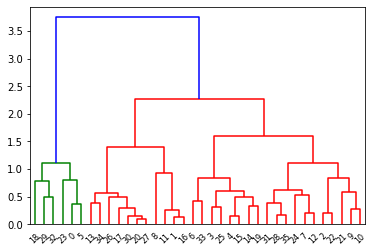

In [13]:
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(df.drop('State_UT',axis=1),method='ward'))

From the dendrogram we saw that the ideal number of clusters for the dataset is 2, the kmeans algorithm also found the same.

In [14]:
list1=['single','complete','average','ward']

In [15]:
from sklearn.cluster import AgglomerativeClustering
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
for j in list1:
  for i in (2,3,4,5):
    agg_m=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage=j)
    mod_k=agg_m.fit(df.drop('State_UT',axis=1))
    #pred_k=mod_k.predict(df.drop('State_UT',axis=1))
    kmean_sil=silhouette_score(df.drop('State_UT',axis=1),agg_m.labels_,metric='euclidean')
    kmean_cal=calinski_harabasz_score(df.drop('State_UT',axis=1),agg_m.labels_)
    kmean_dav=davies_bouldin_score(df.drop('State_UT',axis=1),agg_m.labels_)
    print(i,j)
    print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
    print('---------')
    print('\n')
    l1.append(i)
    l2.append(j)
    l3.append(kmean_sil)
    l4.append(kmean_cal)
    l5.append(kmean_dav)

2 single
2 	 Silhouette Score: 0.20935040549281558 ,Calinski Harbasz Score:  1.905367635008144 ,Davies Bouldin Score:  0.6419306310906434
---------


3 single
3 	 Silhouette Score: 0.1627498618955139 ,Calinski Harbasz Score:  4.293015682478413 ,Davies Bouldin Score:  0.5285915558767577
---------


4 single
4 	 Silhouette Score: 0.2213966814744879 ,Calinski Harbasz Score:  6.805702719372832 ,Davies Bouldin Score:  0.5045172004624144
---------


5 single
5 	 Silhouette Score: 0.23079659477281333 ,Calinski Harbasz Score:  7.796336140146668 ,Davies Bouldin Score:  0.6021675877169781
---------


2 complete
2 	 Silhouette Score: 0.38403267978142674 ,Calinski Harbasz Score:  22.374719523276134 ,Davies Bouldin Score:  1.0044235618268587
---------


3 complete
3 	 Silhouette Score: 0.2720870551673369 ,Calinski Harbasz Score:  14.887961782428999 ,Davies Bouldin Score:  1.0807058066188384
---------


4 complete
4 	 Silhouette Score: 0.2638057285615526 ,Calinski Harbasz Score:  19.320093129453358 

In [16]:
pd.DataFrame({'Cluster':l1,'Linkage':l2,'Silhoutte Score':l3,'Calinski Harabasz Index':l4,'Davies Bouldin Score':l5})

,Cluster,Linkage,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,2,single,0.209350,1.905368,0.641931
1,3,single,0.162750,4.293016,0.528592
2,4,single,0.221397,6.805703,0.504517
3,5,single,0.230797,7.796336,0.602168
4,2,complete,0.384033,22.374720,1.004424
5,3,complete,0.272087,14.887962,1.080706
6,4,complete,0.263806,19.320093,1.125213
7,5,complete,0.270576,17.493914,0.942205
8,2,average,0.448488,24.868991,0.819660
9,3,average,0.319475,14.668642,0.718223


As observed from the output, ideal number of clusters is indeed 2 with linkage methods '**average**' or '**ward**'.

In [17]:
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
for j in list1:
 for i in (2,3,4,5):
  agm=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage=j)
  mod_k=agm.fit(dfc.drop('State_UT',axis=1))
  #pred_k=mod_k.predict(df.drop('State_UT',axis=1))
  kmean_sil=silhouette_score(dfc.drop('State_UT',axis=1),agm.labels_,metric='euclidean')
  kmean_cal=calinski_harabasz_score(dfc.drop('State_UT',axis=1),agm.labels_)
  kmean_dav=davies_bouldin_score(dfc.drop('State_UT',axis=1),agm.labels_)
  print(i,j)
  print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
  print('---------')
  print('\n')
  l1.append(i)
  l2.append(j)
  l3.append(kmean_sil)
  l4.append(kmean_cal)
  l5.append(kmean_dav)

2 single
2 	 Silhouette Score: 0.43893203183343643 ,Calinski Harbasz Score:  6.213533741431188 ,Davies Bouldin Score:  0.36305911461160106
---------


3 single
3 	 Silhouette Score: 0.35876744614391853 ,Calinski Harbasz Score:  7.606582209338366 ,Davies Bouldin Score:  0.5131788994760039
---------


4 single
4 	 Silhouette Score: 0.1550025527865567 ,Calinski Harbasz Score:  5.688970567149966 ,Davies Bouldin Score:  0.5953105894542629
---------


5 single
5 	 Silhouette Score: 0.14354054564260998 ,Calinski Harbasz Score:  5.5488828840580595 ,Davies Bouldin Score:  0.5467554874023214
---------


2 complete
2 	 Silhouette Score: 0.43125840551810274 ,Calinski Harbasz Score:  20.671098960048344 ,Davies Bouldin Score:  0.7866202263770149
---------


3 complete
3 	 Silhouette Score: 0.3347410840627269 ,Calinski Harbasz Score:  24.384749042622857 ,Davies Bouldin Score:  0.8524536367527201
---------


4 complete
4 	 Silhouette Score: 0.30255485753792116 ,Calinski Harbasz Score:  26.385708616659

In [18]:
pd.DataFrame({'Cluster':l1,'Linkage':l2,'Silhoutte Score':l3,'Calinski Harabasz Index':l4,'Davies Bouldin Score':l5})

,Cluster,Linkage,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,2,single,0.438932,6.213534,0.363059
1,3,single,0.358767,7.606582,0.513179
2,4,single,0.155003,5.688971,0.595311
3,5,single,0.143541,5.548883,0.546755
4,2,complete,0.431258,20.671099,0.786620
5,3,complete,0.334741,24.384749,0.852454
6,4,complete,0.302555,26.385709,1.010558
7,5,complete,0.248225,23.080327,1.148964
8,2,average,0.414017,20.959452,0.877199
9,3,average,0.331067,11.844868,0.771804


In case of unnormalized dataset, 2 clusters with complete linkage is the best. But in case of normalized dataset, the performance is better. There the Silhoutte Score and Calinski Harabarz Score performance is better though the Davies Bouldin score pervermance is a bit lower.

Cluster 2 for both algorithms KMeans and Agglomerative have same performance. Let's see the how the values for each feature vary across the two clusters.

In [19]:
kmeansf=KMeans(n_clusters=2,random_state=31)
kmeansf.fit(df.drop(['State_UT'],axis=1))
pred_kk=kmeansf.predict(df.drop(['State_UT'],axis=1))
df['pred_k2']=pred_kk

In [20]:
df.head()

,State_UT,mean_dropout,enrollment_ratio,comp,electricity,water,boys_toilet,female_toilet,pred_k2
0,A & N Islands,0.230010,0.404943,0.387047,0.295219,0.257102,0.216763,0.206779,0
1,Andhra Pradesh,0.401083,0.226258,0.500472,0.923247,0.952994,0.996763,0.998670,1
2,Arunachal Pradesh,0.619885,0.804452,0.390787,0.442575,0.678186,0.756671,0.777405,1
3,Assam,0.733952,0.301526,0.264339,0.343321,0.837857,0.613463,0.691578,1
4,Bihar,0.403778,0.383082,0.075522,0.149815,0.944448,0.832581,0.854044,1


In [21]:
df1=pd.melt(frame=df.drop('State_UT',axis=1),id_vars='pred_k2',var_name='parameters',value_name='values')
df1.head()

,pred_k2,parameters,values
0,0,mean_dropout,0.230010
1,1,mean_dropout,0.401083
2,1,mean_dropout,0.619885
3,1,mean_dropout,0.733952
4,1,mean_dropout,0.403778


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


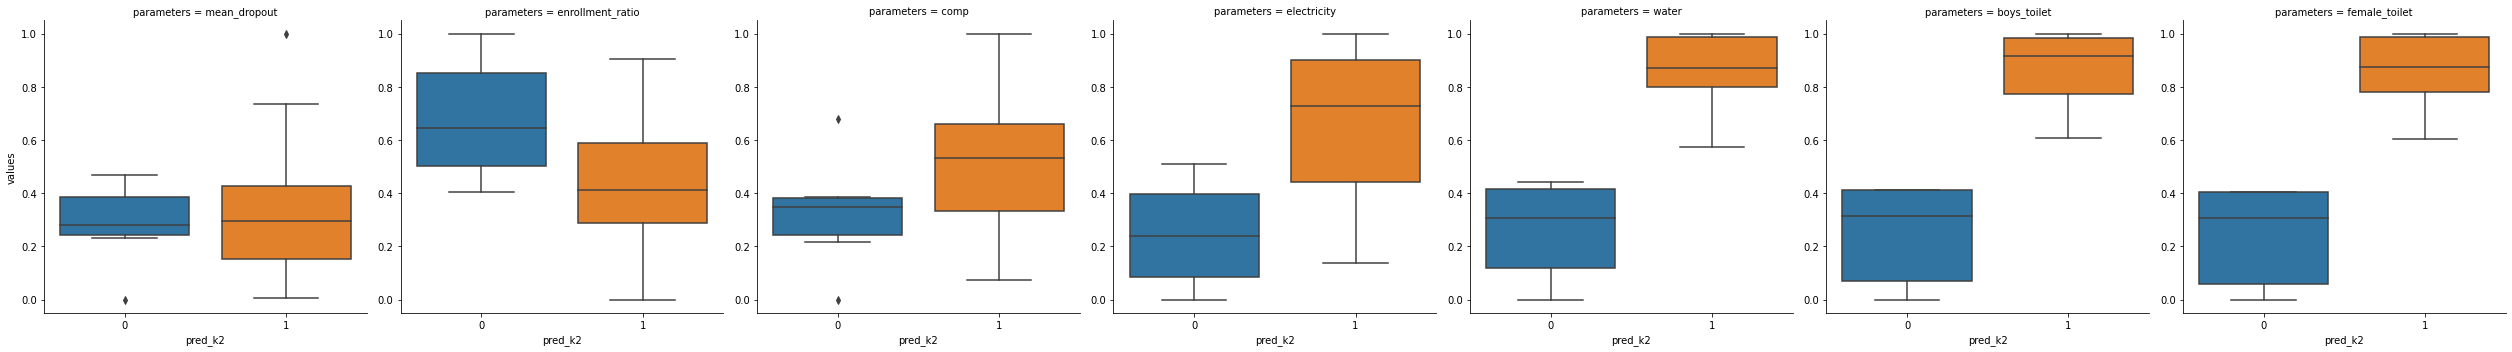

In [22]:
import seaborn as sns 
sns.factorplot(data=df1,y='values',x='pred_k2',col='parameters',kind='box',sharey=False)

In [23]:
agg_mod_=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
agg_mod_.fit(df.drop('State_UT',axis=1))
df['agg_clust2']=agg_mod_.labels_

In [24]:
df2=pd.melt(frame=df.drop(['State_UT','pred_k2'],axis=1),id_vars='agg_clust2',var_name='parameters',value_name='values')
df2.head()

,agg_clust2,parameters,values
0,1,mean_dropout,0.230010
1,0,mean_dropout,0.401083
2,0,mean_dropout,0.619885
3,0,mean_dropout,0.733952
4,0,mean_dropout,0.403778


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


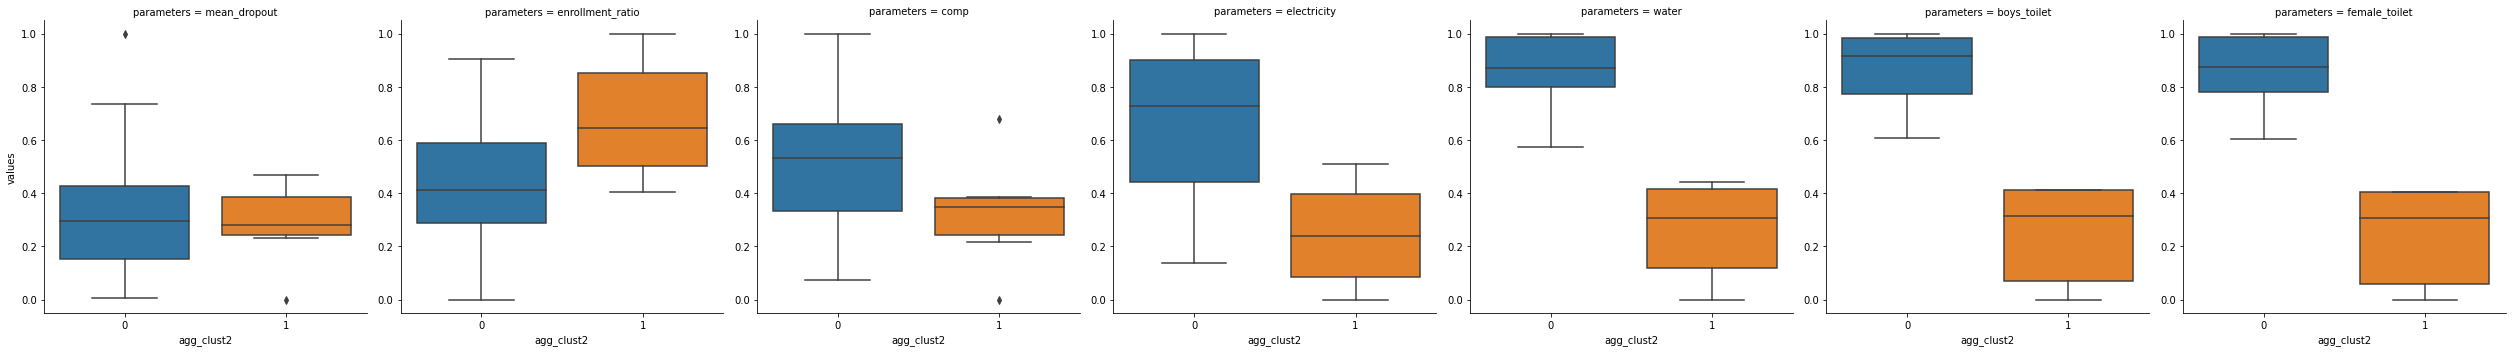

In [25]:
sns.factorplot(data=df2,y='values',x='agg_clust2',col='parameters',kind='box',sharey=False)

We see that both the KMeans and Agglomerative Clustering have the value range of each of the feature/category exactly the same.

Based on careful observations of the boxplots we can conclude that category has higher values of for comp, electricity, water and the toilets features. So we can says the states falling in category 0 has much better infrastructure than schools of category 1. On the otherhand, the dropout rate is almost same for both groups with 0 has higher variablity. While the enrollment ratio is good for group 1. 

So we can call group 0 as Higher Infrastructure, Lesser Enrollment-Ratio and and group 1 as Less-Infrastructure, Better Enrollment-Ratio.

In [26]:
# Checking which states fall in cluster 1 i.e, Less-Infrastructure, Better Enrollment-Ratio cluster
df[df['pred_k2']==1]

,State_UT,mean_dropout,enrollment_ratio,comp,electricity,water,boys_toilet,female_toilet,pred_k2,agg_clust2
1,Andhra Pradesh,0.401083,0.226258,0.500472,0.923247,0.952994,0.996763,0.998670,1,0
2,Arunachal Pradesh,0.619885,0.804452,0.390787,0.442575,0.678186,0.756671,0.777405,1,0
3,Assam,0.733952,0.301526,0.264339,0.343321,0.837857,0.613463,0.691578,1,0
4,Bihar,0.403778,0.383082,0.075522,0.149815,0.944448,0.832581,0.854044,1,0
6,Chhattisgarh,0.294578,0.477794,0.210192,0.692349,0.975029,0.953265,0.966225,1,0
7,Dadra & Nagar Haveli,0.272537,0.277721,0.568515,0.836704,0.814485,0.609167,0.802111,1,0
8,Daman & Diu,1.000000,0.000000,0.760871,0.836704,0.814485,0.805368,0.802111,1,0
9,Delhi,0.310777,0.906415,0.659361,0.836704,0.814485,0.805368,0.802111,1,0
10,Goa,0.201096,0.669071,0.587248,0.836146,0.814485,0.805368,0.802111,1,0
11,Gujarat,0.397651,0.266727,0.745169,0.998344,0.999666,0.999451,0.999345,1,0


In [27]:
# Renaming the clusters as discussed before
df['pred_k2_label']=df.pred_k2.map({0:'Higher Infrastructure, Lesser Enrollment-Ratio',1:'Less-Infrastructure, Better Enrollment-Ratio'})

In [28]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 16.7 MB 35.9 MB/s 
     |████████████████████████████████| 6.3 MB 31.2 MB/s 


In [29]:
# Importing the shape file for Indian states. It is a vector map representation where places are represented as collection of discrete objects using points, lines & polygons.
# Geopandas is similar to Pandas but contains geographical locations
import geopandas
map=geopandas.read_file('Indian_States.shp')
map.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [30]:
# Replacing name of our original states with name as given in geopandas table to merge both of them
replace={'A & N Islands':'Andaman & Nicobar Island','Arunachal Pradesh':'Arunanchal Pradesh','Dadra & Nagar Haveli':'Dadara & Nagar Havelli', 'Delhi':'NCT of Delhi'}
df = df.replace({"State_UT": replace})  

In [31]:
# Merging original table with geopandas table
mer_g=pd.merge(df,map,left_on='State_UT',right_on='st_nm',how='inner')
mer_g.head()

,State_UT,mean_dropout,enrollment_ratio,comp,electricity,water,boys_toilet,female_toilet,pred_k2,agg_clust2,pred_k2_label,st_nm,geometry
0,Andaman & Nicobar Island,0.230010,0.404943,0.387047,0.295219,0.257102,0.216763,0.206779,0,1,"Higher Infrastructure, Lesser Enrollment-Ratio",Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Andhra Pradesh,0.401083,0.226258,0.500472,0.923247,0.952994,0.996763,0.998670,1,0,"Less-Infrastructure, Better Enrollment-Ratio",Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17..."
2,Arunanchal Pradesh,0.619885,0.804452,0.390787,0.442575,0.678186,0.756671,0.777405,1,0,"Less-Infrastructure, Better Enrollment-Ratio",Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
3,Assam,0.733952,0.301526,0.264339,0.343321,0.837857,0.613463,0.691578,1,0,"Less-Infrastructure, Better Enrollment-Ratio",Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
4,Bihar,0.403778,0.383082,0.075522,0.149815,0.944448,0.832581,0.854044,1,0,"Less-Infrastructure, Better Enrollment-Ratio",Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."


In [32]:
# converting the coordinate reference system to epsg 4326. It containes the geometry of states in terms of their latitude
# and longitude
from geopandas import GeoDataFrame
merg= GeoDataFrame(mer_g,crs={'init': 'epsg:4326'})

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [47]:
!pip install pandas_bokeh

In [33]:
merg.head()

,State_UT,mean_dropout,enrollment_ratio,comp,electricity,water,boys_toilet,female_toilet,pred_k2,agg_clust2,pred_k2_label,st_nm,geometry
0,Andaman & Nicobar Island,0.230010,0.404943,0.387047,0.295219,0.257102,0.216763,0.206779,0,1,"Higher Infrastructure, Lesser Enrollment-Ratio",Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Andhra Pradesh,0.401083,0.226258,0.500472,0.923247,0.952994,0.996763,0.998670,1,0,"Less-Infrastructure, Better Enrollment-Ratio",Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17..."
2,Arunanchal Pradesh,0.619885,0.804452,0.390787,0.442575,0.678186,0.756671,0.777405,1,0,"Less-Infrastructure, Better Enrollment-Ratio",Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
3,Assam,0.733952,0.301526,0.264339,0.343321,0.837857,0.613463,0.691578,1,0,"Less-Infrastructure, Better Enrollment-Ratio",Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
4,Bihar,0.403778,0.383082,0.075522,0.149815,0.944448,0.832581,0.854044,1,0,"Less-Infrastructure, Better Enrollment-Ratio",Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."


In [48]:
# plotting the clusters in map and coloring states based on the cluster they fall
import pandas_bokeh
pandas_bokeh.output_notebook()
merg.plot_bokeh(
    figsize=(900, 600),
    simplify_shapes=5000,
    category="pred_k2",
    show_colorbar=False,
    colormap=["yellow", "green"],
    hovertool_columns=["State_UT", "pred_k2_label"])

/usr/local/lib/python3.7/dist-packages/pandas_bokeh/geoplot.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


Figure(id='1002', ...)

Only 6 districts got classified in one cluster and rest 30 in others. We need more finer categorization or grouping for more ease of analysis of schools across groups. So we will increase the number of cluster to 3. Though according to clustering algorithm, 2 is the most valid choice of the number of clusters, we can really modify the results for the sake of our end goal if needed.

In [37]:
agg_mod_=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
agg_mod_.fit(dfc.drop('State_UT',axis=1))
dfc['agg_clust']=agg_mod_.labels_

In [38]:
dfc.head(4)

,State_UT,mean_dropout,enrollment_ratio,comp,electricity,water,boys_toilet,female_toilet,agg_clust
0,A & N Islands,7.191667,83.746667,50.113636,60.893636,63.636364,63.636364,63.636364,2
1,Andhra Pradesh,9.850000,75.552500,58.854545,95.706364,97.686364,99.777273,99.913636,1
2,Arunachal Pradesh,13.250000,102.067500,50.401818,69.061818,84.240000,88.652727,89.777273,0
3,Assam,15.022500,79.004167,40.657273,63.560000,92.052727,82.017273,85.845455,0


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


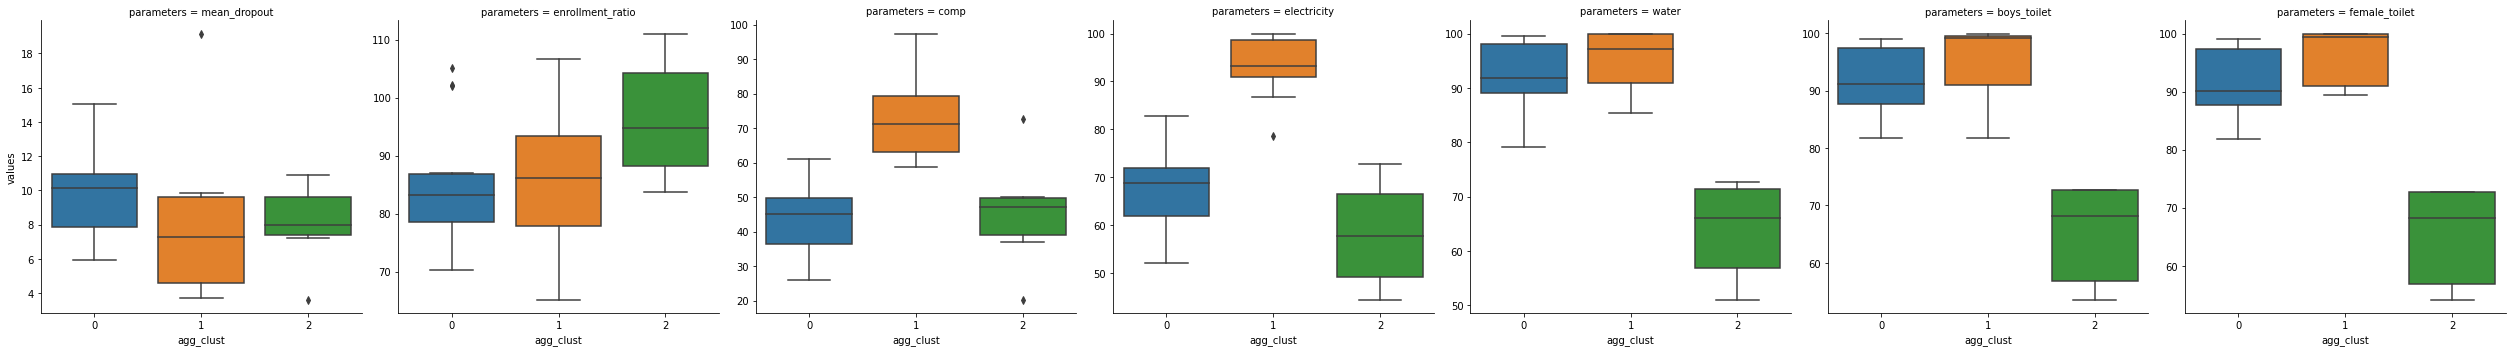

In [39]:
df3=pd.melt(frame=dfc.drop(['State_UT'],axis=1),id_vars='agg_clust',var_name='parameters',value_name='values')
sns.factorplot(data=df3,y='values',x='agg_clust',col='parameters',kind='box',sharey=False)

If we see the boxplots carefully we will find that in terms of infrastructure comp(computer), electricity, water and toilets have highest range for cluster 1(though the difference is not much great for water and the toilets),so it's the best cluster in terms of infrastructure. Then comes cluster 0 and lastly cluster 2 has the poorest range of values for infrastructure. Enrollment ratio is highest in case of cluster 2 , cluster 0 and 1 have almost similar enrollment ratio with cluster 1 has higher variability in it's high range of values. In terms of dropout ratio cluster 0 has higher range of values than others.

Thus we name the clusters as:

0: Good Infrastucture,less enrollment ratio, high dropout

1: Best infrastructure, Good enrollment ratio, low dropout

2: Inadequate Infrastructure, Best Infrastructure Ratio, medium dropout

Note: **Best > Good**                           

 **High > Medium > Low**

In [40]:
kmeansy=KMeans(n_clusters=3,random_state=31)
kmeansy.fit(dfc.drop(['State_UT','agg_clust'],axis=1))
pred_k=kmeansy.predict(dfc.drop(['State_UT','agg_clust'],axis=1))
dfc['pred_k3']=pred_k

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


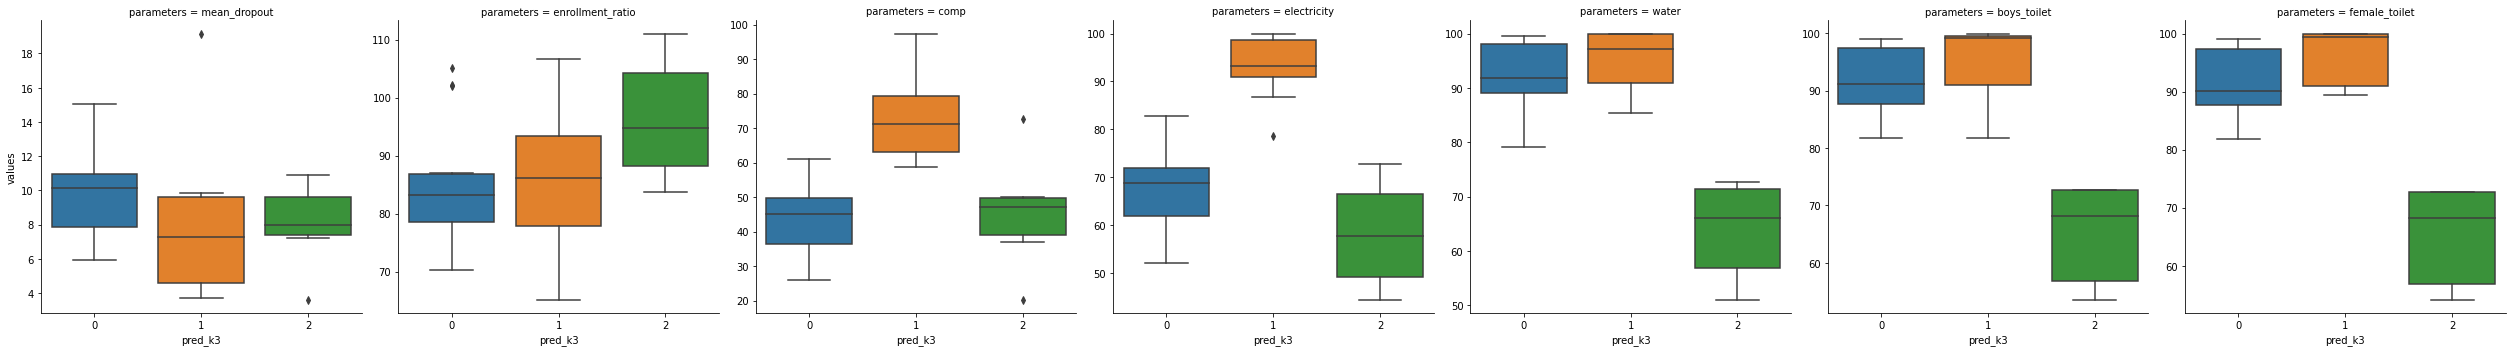

In [41]:
df4=pd.melt(frame=dfc.drop(['State_UT','agg_clust'],axis=1),id_vars='pred_k3',var_name='parameters',value_name='values')
sns.factorplot(data=df4,y='values',x='pred_k3',col='parameters',kind='box',sharey=False)

If checked carefully, we will find that the results are very similar to Agglomerative Clustering only Cluster 0 in former is represented as cluster 1 in latter.

In [42]:
dfc = dfc.replace({"State_UT": replace}) 

In [43]:
dfc['Clust_Label']=dfc.agg_clust.map({0:'Good Infrastucture,less enrollment ratio, high dropout',1:'Best infrastructure, Good enrollment ratio, low dropout',2:'Inadequate Infrastructure, Best Infrastructure Ratio, medium dropout'})

In [44]:
merg['agg_clust']=dfc['agg_clust']
merg['Clust_Label']=dfc['Clust_Label']

In [45]:
merg.agg_clust.value_counts()

1    16
0    14
2     6
Name: agg_clust, dtype: int64

We can see that in cluster 0 there are 16 states, 14 states in cluster 1 and 6 states in cluster 2. 

Basically cluster 0 in 2-clustered which had 30 states is divided into cluster-0 & 1 in the ratio 16:14 .

In [49]:
merg.plot_bokeh(
    figsize=(900, 600),
    simplify_shapes=5000,
    category="agg_clust",
    show_colorbar=False,
    colormap=["yellow", "green",'red'],
    hovertool_columns=["State_UT","Clust_Label"])

/usr/local/lib/python3.7/dist-packages/pandas_bokeh/geoplot.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


Figure(id='1133', ...)

So as we can see the states are coloured according the the clusters they fall into.

Thus we successfully grouped Indian states into various clusters. This will help the Education Department to plan improvement schemes for each cluster specifically which will result in greater progress in the field of education in India.